In [520]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as opt


# Visualizing

In [521]:
def loadData():
    data = sio.loadmat('ex5data1.mat')

    X = data['X'] #(12, 1)
    y = data['y'] #(12, 1)
    Xcv = data['Xval']
    ycv = data['yval']
    Xtest = data['Xtest']
    ytest = data['ytest']

    return X, y, Xcv, ycv, Xtest, ytest


In [522]:
X, y, Xcv, ycv, Xtest, ytest = loadData()

# Cost function

In [523]:
def linearRegCost(theta, X, y, alpha):

    X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)
    X = np.matrix(X) #(12, 2)
    y = np.matrix(y)
    theta = np.matrix(theta)
    grad = np.zeros(theta.shape[1])
    m = len(X)
    
    cos = np.power((X * theta.T - y), 2) #(12, 1)
    reg = (alpha / (2 * m)) * np.sum(np.power(theta[:, 1:], 2))

    cost = np.sum(cos) / (2 * m) + reg
    for i in range(1, theta.shape[1]):
        grad[i] = np.sum((X * theta.T - y).T * X[:, 1:]) / m + (alpha / m) * theta[:, i]
    grad[0] = np.sum((X * theta.T - y).T * X[:, 0]) / m
 

    return cost, grad

In [524]:
theta = [1, 1]
J, grad = linearRegCost(theta, X, y, 1)
J, grad


(303.9931922202643, array([-15.30301567, 598.25074417]))

In [525]:
fmin = opt.minimize(fun=linearRegCost, x0=theta, args=(X, y, 0), method='TNC', jac=True, options={'maxiter':500})
fmin.x.shape

(2,)

In [526]:
def linearFit(data, X_c, theta_min):
    plt.xlabel('X')
    plt.ylabel('Y')
    X = data['X']
    y = data['y']
    theta_min = np.matrix(theta_min)
    X_bias = np.insert(X_c, 0, values=np.ones(X.shape[0]), axis=1)

    color = '#00CED1'
    area = np.pi * 4**2  # 点面积 

    #画直线
    y_pred = X_bias * theta_min.T
    plt.plot(X, y_pred, color='r')

    # 画散点图
    plt.scatter(X, y, s=area, c=color, alpha=0.4, label='Training data')
    plt.legend()

    plt.show()


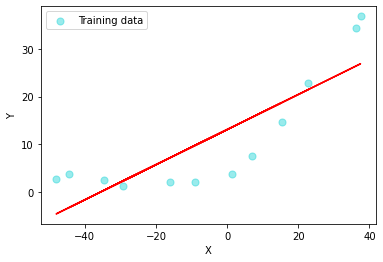

In [527]:
linearFit(data, X, fmin.x)

# Bias-variance

In [528]:
def errorCompute(X, y, theta):
    
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    m = len(X)

    J = np.power((X * theta.T - y), 2)
    return np.sum(J) / (2 * m)

In [529]:
def learningCurve(X, y, Xcv, ycv, theta):
    # X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)
    X = np.matrix(X)
    y = np.matrix(y)
    Xcv = np.insert(Xcv, 0, values=np.ones(Xcv.shape[0]), axis=1)
    Xcv = np.matrix(Xcv)
    ycv = np.matrix(ycv)
    theta = np.matrix(theta)
    m = len(X)
    error_train = np.zeros(int(m / 2))
    error_cv = np.zeros(int(m / 2))
    # print(X[0 : 4, :])

    for i in range(1, int(m / 2)):
        fmin = opt.minimize(fun=linearRegCost, x0=theta, args=(X[0 : 2*i, :], y[0 : 2*i, :], 0), method='TNC', jac=True, options={'maxiter':500})
        # theta_min = np.matrix(fmin.x)
        X_temp = np.insert(X[0 : 2*i, :], 0, values=np.ones(X[0 : 2*i, :].shape[0]), axis=1) #(m, 2)
        error_cv[i] = errorCompute(Xcv, ycv, fmin.x)
        error_train[i] = errorCompute(X_temp[0 : 2*i, :], y[0 : 2*i, :], fmin.x)
    
    x = range(1, int(m / 2))
    plt.plot(x, error_train[1:])
    plt.plot(x, error_cv[1:])
    plt.figure(figsize = (12, 8))
    plt.show()

    return error_train, error_cv


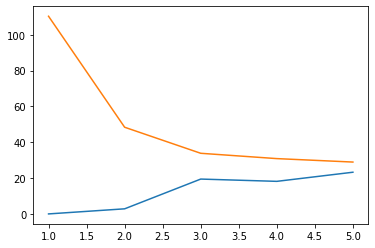

<Figure size 864x576 with 0 Axes>

In [530]:
error_train, error_cv = learningCurve(X, y, Xcv, ycv, theta)

In [531]:
def normalize_feature(df):
    """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [532]:
def polyFeatures(X, p):
    for i in range(1, p):
        X = np.insert(X, i, values = np.power(X[:, 0], i+1), axis=1)
    X_nol = pd.DataFrame(X)
    X_nol = normalize_feature(X_nol)
    X_nol = np.matrix(X_nol)
    return X_nol

In [533]:
X_test = polyFeatures(X, 3)
X_test

matrix([[-3.62140776e-01, -7.55086688e-01,  1.82225876e-01],
        [-8.03204845e-01,  1.25825266e-03, -2.47936991e-01],
        [ 1.37746700e+00,  5.84826715e-01,  1.24976856e+00],
        [ 1.42093988e+00,  7.06646754e-01,  1.35984559e+00],
        [-1.43414853e+00,  1.85399982e+00, -2.03716308e+00],
        [-1.28687086e-01, -9.75968776e-01,  2.51385075e-01],
        [ 6.80581552e-01, -7.80028951e-01,  3.40655738e-01],
        [-9.88534310e-01,  4.51358004e-01, -6.01281871e-01],
        [ 2.16075753e-01, -1.07499276e+00,  2.66275156e-01],
        [-1.31150068e+00,  1.42280595e+00, -1.54812094e+00],
        [ 4.03776736e-01, -1.01501039e+00,  2.73378511e-01],
        [ 9.29375305e-01, -4.19807932e-01,  5.10968368e-01]])

### 下一步利用增加项数后的数据集进行线性回归
### 进行散点图绘制观察拟合情况
### 观察是否存在高偏差和高方差问题

In [534]:
X, y, Xcv, ycv, Xtest, ytest = loadData()
theta = np.ones(9) #(1, 9)
X_nol = polyFeatures(X, 8)

In [535]:
fmin = opt.minimize(fun=linearRegCost, x0=theta, args=(X_nol, y, 0), method='TNC', jac=True, options={'maxiter':500})

In [536]:
fmin.x 

array([11.2175892 ,  4.22692738,  4.22692738,  4.22692738,  4.22692738,
        4.22692738,  4.22692738,  4.22692738,  4.22692738])

In [542]:
X_nol = polyFeatures(X, 8)
Xcv_nol = polyFeatures(Xcv, 8)
theta = np.ones(9)
# print(X_nol)

In [538]:
def poly_errorCompute(X, y, theta):
    X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    m = len(X)

    J = np.power((X * theta.T - y), 2)
    return np.sum(J) / (2 * m)

In [562]:
def poly_learningCurve(X, y, Xcv, ycv, l, theta):
    X = np.matrix(X)
    y = np.matrix(y)
    Xcv = np.matrix(Xcv)
    ycv = np.matrix(ycv)

    m = len(X)
    error_train = np.zeros(int(m / 2) + 1)
    error_cv = np.zeros(int(m / 2) + 1)

    for i in range(1, int(m / 2) + 1):
        fmin = opt.minimize(fun=linearRegCost, x0=theta, args=(X[0 : 2*i, :], y[0 : 2*i, :], l), method='TNC', jac=True, options={'maxiter':500})
        error_train[i] = poly_errorCompute(X[0 : 2*i, :], y[0 : 2*i, :], fmin.x)
        # error_train[i] = poly_errorCompute(X, y, fmin.x)
        error_cv[i] = poly_errorCompute(Xcv, ycv, fmin.x)
    
    x = range(1, int(m / 2) + 1)
    plt.plot(x, error_train[1:])
    plt.plot(x, error_cv[1:])
    plt.figure(figsize = (12, 8))
    plt.show()


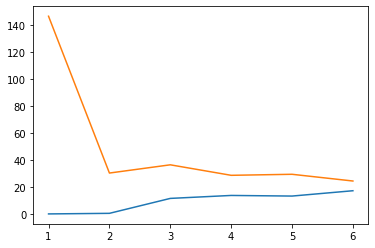

<Figure size 864x576 with 0 Axes>

In [567]:
poly_learningCurve(X_nol, y, Xcv_nol, ycv, 2, theta)
